# Assignment 2

Faradilla Ardiyani | PYTN-KS02-005 | Studi Independen

## Project Overview

Using what you’ve learned; download the NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

- BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
- BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
- BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

- Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
- This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. Examples of questions can be:

- Is there a difference in unit sold between property built in 1900-2000 and 2001 so on?
- Is there a difference in unit sold based on building category?
- What can you discover about New York City real estate by looking at a year's worth of raw transaction records? Can you spot trends in the market?

## Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Import Dataset

Dataset berisi tentang NYC Property Sales dari kaggle (https://www.kaggle.com/new-york-city/nyc-property-sales)

In [2]:
# Memasukkan non-standar missing value ke dalam dataset
missing_values = ['n/a', 'na', "--", "?", "NA", 'n-a', 'NaN',' ','-']
df = pd.read_csv('nyc-rolling-sales.csv', na_values=missing_values)

## Data Understanding

In [3]:
# Menampilkan baris 5 data teratas
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
# Menampilkan baris 5 data terbawah
df.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,NaN,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,NaN,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,NaN,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,NaN,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,NaN,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [5]:
# Melihat jumlah baris dan kolom
df.shape

(84548, 22)

Dataset mempunyai 84548 baris dan 22 kolom

In [6]:
# Menampilkan daftar kolom yang ada dari dataset
df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [7]:
# Menampilkan informasi tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            83810 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       0 non-null      float64
 8   BUILDING CLASS AT PRESENT       83810 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                19052 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

Dataset terdiri 2 tipe data, yaitu integer dan object

In [8]:
#melihat ringkasan statistik variabel tipe numerik
df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,EASE-MENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,0.0,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,NaN,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,NaN,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,NaN,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,NaN,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,NaN,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,NaN,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [9]:
#melihat ringkasan statistik variabel tipe kategorik
df.describe(include="O")

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,LAND SQUARE FEET,GROSS SQUARE FEET,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
count,84548,84548,83810,83810,84548,19052,84548,84548,84548,84548,84548
unique,254,47,10,166,67563,3988,6062,5691,166,10008,364
top,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,D4,131-05 40TH ROAD,4,-,-,R4,-,2017-06-29 00:00:00
freq,3068,18235,38633,12663,210,298,26252,27612,12989,14561,544


## Pre-processing

Menghapus kolom yang tidak diperlukan (Unnamed: 0)

In [10]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

### Mengecek Tipe Data

Mengubah tipe data "SALE DATE" ke datetime

In [11]:
df["SALE DATE"]= pd.to_datetime(df["SALE DATE"], errors='coerce')

Mengubah tipe data ke numerik

In [12]:
numeric = ["RESIDENTIAL UNITS", "COMMERCIAL UNITS", "TOTAL UNITS", "LAND SQUARE FEET", "GROSS SQUARE FEET", "SALE PRICE" ]

for col in numeric: 
    df[col] = pd.to_numeric(df[col], errors='coerce')

Mengubah tipe data ke kategorik

In [13]:
categorical = ["BOROUGH", "NEIGHBORHOOD", "BUILDING CLASS CATEGORY", "TAX CLASS AT PRESENT", "BUILDING CLASS AT PRESENT", "ZIP CODE", "YEAR BUILT", "TAX CLASS AT TIME OF SALE", "BUILDING CLASS AT TIME OF SALE"]

for col in categorical: 
    df[col] = df[col].astype("category")

Mengecek kembali tipe data

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            83810 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   EASE-MENT                       0 non-null      float64       
 7   BUILDING CLASS AT PRESENT       83810 non-null  category      
 8   ADDRESS                         84548 non-null  object        
 9   APARTMENT NUMBER                19052 non-null  object        
 10  ZIP CODE                        84548 non-null  category      
 11  RE

Tipe data terbagi menjadi category, integer, float, object, dan datetime

### Duplikasi Data

In [15]:
#Mengecek duplikasi data
df.duplicated().sum()

765

Terdapat 765 baris data duplikat

In [16]:
#Menghapus data duplikat dan mengecek ulang duplikasi data
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Sudah tidak terdapat duplikasi data

### Missing Value

In [17]:
# Mengecek missing value
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         83783
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  64934
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26054
GROSS SQUARE FEET                 27385
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
dtype: int64

Terlihat bahwa terdapat missing value pada 7 atribut

#### Menangani missing value

In [18]:
#Menghapus kolom yang mengandung banyak missing value
df.drop(["EASE-MENT","APARTMENT NUMBER"], axis=1, inplace=True)

In [19]:
#Melakukan imputasi pada atribut kategorik menggunakan modus
df["TAX CLASS AT PRESENT"]=df["TAX CLASS AT PRESENT"].fillna(df["TAX CLASS AT PRESENT"].mode())
df["BUILDING CLASS AT PRESENT"]=df["BUILDING CLASS AT PRESENT"].fillna(df["BUILDING CLASS AT PRESENT"].mode())

In [20]:
#Melakukan imputasi pada atribut kategorik menggunakan median
df["LAND SQUARE FEET"]=df["LAND SQUARE FEET"].fillna(df["LAND SQUARE FEET"].median())
df["GROSS SQUARE FEET"]=df["GROSS SQUARE FEET"].fillna(df["GROSS SQUARE FEET"].median())

In [21]:
#Menghapus baris yang mengandung missing value
df = df.dropna()

In [22]:
#Mengecek ulang missing value
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

Sudah tidak terdapat missing value pada data

### Statistik Deskriptif

In [23]:
df.describe()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
count,68934.000000,68934.000000,68934.000000,68934.000000,68934.000000,6.893400e+04,6.893400e+04,6.893400e+04
mean,4207.065425,365.869905,1.893376,0.165724,2.079424,3.190863e+03,2.973185e+03,1.270954e+06
std,3434.933083,652.366450,14.359786,9.041035,17.074241,3.331893e+04,2.435950e+04,1.144376e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1356.250000,21.000000,0.000000,0.000000,1.000000,1.900000e+03,1.280000e+03,2.290000e+05
50%,3390.000000,50.000000,1.000000,0.000000,1.000000,2.314000e+03,1.680000e+03,5.300000e+05
75%,6191.750000,453.000000,2.000000,0.000000,2.000000,2.504000e+03,2.070000e+03,9.500000e+05
max,16319.000000,9106.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2.210000e+09


Menghitung nilai 0 pada kolom

In [24]:
print("ZIP CODE '0' Count: ",df[df['ZIP CODE']==0]['ZIP CODE'].count())
print("TOTAL UNIT '0' Count: ",df[df['TOTAL UNITS']==0]['TOTAL UNITS'].count())
print("YEAR BUILT '0' Count: ",df[df['YEAR BUILT']==0]['YEAR BUILT'].count())
print("SALE PRICE '0' Count: ",df[df['SALE PRICE']==0]['SALE PRICE'].count())

ZIP CODE '0' Count:  396
TOTAL UNIT '0' Count:  16910
YEAR BUILT '0' Count:  4673
SALE PRICE '0' Count:  9932


Mengganti nilai 0 dengan nan

In [25]:
df['ZIP CODE'].replace(0, np.nan, inplace=True)
df['YEAR BUILT'].replace(0, np.nan, inplace=True)
df['TOTAL UNITS'].replace(0, np.nan, inplace=True)
df['SALE PRICE'].replace(0, np.nan, inplace=True)

Mengecek missing value

In [26]:
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
ZIP CODE                            396
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                       16910
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                         4673
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                         9932
SALE DATE                             0
dtype: int64

In [27]:
#Menghapus missing value
df.dropna(inplace=True)

In [28]:
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40246 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         40246 non-null  category      
 1   NEIGHBORHOOD                    40246 non-null  category      
 2   BUILDING CLASS CATEGORY         40246 non-null  category      
 3   TAX CLASS AT PRESENT            40246 non-null  category      
 4   BLOCK                           40246 non-null  int64         
 5   LOT                             40246 non-null  int64         
 6   BUILDING CLASS AT PRESENT       40246 non-null  category      
 7   ADDRESS                         40246 non-null  object        
 8   ZIP CODE                        40246 non-null  category      
 9   RESIDENTIAL UNITS               40246 non-null  int64         
 10  COMMERCIAL UNITS                40246 non-null  int64         
 11  TO

#### Encoding

In [30]:
df['BOROUGH']= df['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens', 5:'Staten Island'})
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5.0,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10.0,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6.0,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009,8,0,8.0,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009,24,0,24.0,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07


## Exploratory Data Analysis

### Measure of Central Tendency

### Mean

Mean SALE PRICE

In [31]:
meanSP = df['SALE PRICE'].mean()
meanSP

1736253.3939770411

Mean SALE PRICE pada setiap Borough

In [32]:
mean_Manhattan = df[df['BOROUGH'] == 'Manhattan']['SALE PRICE'].mean()
mean_Bronx = df[df['BOROUGH'] == 'Bronx']['SALE PRICE'].mean()
mean_Brooklyn = df[df['BOROUGH'] == 'Brooklyn']['SALE PRICE'].mean()
mean_Queens   = df[df['BOROUGH'] == 'Queens']['SALE PRICE'].mean()
mean_StatenIsland = df[df['BOROUGH'] == 'Staten Island']['SALE PRICE'].mean()

In [33]:
print('Mean Manhattan     :', mean_Manhattan)
print('Mean Bronx         :', mean_Bronx)
print('Mean Brooklyn      :', mean_Brooklyn)
print('Mean Queens        :', mean_Queens)
print('Mean Staten Island  :', mean_StatenIsland)

Mean Manhattan     : 5883647.468092271
Mean Bronx         : 1009309.1555915722
Mean Brooklyn      : 1417074.1256328046
Mean Queens        : 881846.3211438209
Mean Staten Island  : 507942.4307234192


Rata-rata wilayah dengan sale price tertinggi adalah Manhattan, sedangkan Staten Island adalah wilayah dengan rata-rata sale price terendah

In [34]:
mean_borough = df.groupby('BOROUGH').mean()
mean_borough

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Manhattan,1013.148005,1142.965146,4.083179,0.368244,4.479879,2870.289274,7149.222091,5.883647e+06
Bronx,4152.033495,130.717180,4.185845,0.185845,4.373582,4247.046731,5268.247434,1.009309e+06
Brooklyn,4191.840786,366.433682,2.244009,0.138964,2.398414,2189.834374,2677.563787,1.417074e+06
Queens,7498.081110,251.347286,1.979531,0.317157,2.310641,3704.733901,2723.190586,8.818463e+05
Staten Island,3335.284813,205.475565,1.318970,0.087581,1.406201,5350.383780,2203.278683,5.079424e+05


Secara keseluruhan, wilayah Manhattan mempunyai rata-rata tertinggi untuk lot, commercial units, total units, gross square feet, dan sale price

### Median

Median SALE PRICE

In [35]:
medianSP = df['SALE PRICE'].median()
medianSP

685000.0

Median SALE PRICE pada setiap Borough

In [36]:
med_Manhattan = df[df['BOROUGH'] == 'Manhattan']['SALE PRICE'].median()
med_Bronx = df[df['BOROUGH'] == 'Bronx']['SALE PRICE'].median()
med_Brooklyn = df[df['BOROUGH'] == 'Brooklyn']['SALE PRICE'].median()
med_Queens   = df[df['BOROUGH'] == 'Queens']['SALE PRICE'].median()
med_StatenIsland = df[df['BOROUGH'] == 'Staten Island']['SALE PRICE'].median()

In [37]:
print('Median Manhattan     :', med_Manhattan)
print('Median Bronx         :', med_Bronx)
print('Median Brooklyn      :', med_Brooklyn)
print('Median Queens        :', med_Queens)
print('Median Staten Island  :', med_StatenIsland)

Median Manhattan     : 1890000.0
Median Bronx         : 475000.0
Median Brooklyn      : 850000.0
Median Queens        : 630000.0
Median Staten Island  : 470000.0


Median tertinggi untuk sale price adalah Manhattan, sedangkan median terendah adalah Staten Island

### Modus

Modus pada data kategorik

In [38]:
mode_borough = statistics.mode(df['BOROUGH'])
mode_Neighborhood = statistics.mode(df['NEIGHBORHOOD'])
mode_Bcc = statistics.mode(df['BUILDING CLASS CATEGORY'])
mode_Tcp = statistics.mode(df['TAX CLASS AT PRESENT'])
mode_Bcp = statistics.mode(df['BUILDING CLASS AT PRESENT'])
mode_Zipcode = statistics.mode(df['ZIP CODE'])
mode_Tcts = statistics.mode(df['TAX CLASS AT TIME OF SALE'])
mode_Bcts = statistics.mode(df['BUILDING CLASS AT TIME OF SALE'])

In [39]:
print("Modus Borough                         :" , mode_borough)
print("Modus Neighborhood                    :" , mode_Neighborhood)
print("Modus Building Class Category         :" , mode_Bcc)
print("Modus Tax Class at Present            :" , mode_Tcp)
print("Modus Building Class at Present       :" , mode_Bcp)
print("Modus Zip Code                        :" , mode_Zipcode) 
print("Modus Tax Class at Time of Sale       :" , mode_Tcts)
print("Modus Building Class at Time of Sale  :" , mode_Bcts)

Modus Borough                         : Queens
Modus Neighborhood                    : FLUSHING-NORTH
Modus Building Class Category         : 01 ONE FAMILY DWELLINGS                    
Modus Tax Class at Present            : 1
Modus Building Class at Present       : R4
Modus Zip Code                        : 10314
Modus Tax Class at Time of Sale       : 1
Modus Building Class at Time of Sale  : R4


### Measure of Spread

### Range

Range pada SALE PRICE

In [40]:
rangeSP = np.ptp(df['SALE PRICE'])
rangeSP

2209999999.0

Range pada SALE PRICE di setiap Borough

In [41]:
range_bor = df.groupby('BOROUGH').apply(lambda x: x['SALE PRICE'].max()-x['SALE PRICE'].min())
range_bor

BOROUGH
Manhattan        2.210000e+09
Bronx            1.100000e+08
Brooklyn         1.542500e+08
Queens           2.575000e+08
Staten Island    1.190000e+07
dtype: float64

Range sale price antar wilayah tidak terlalu berbeda jauh antara satu sama lain

### Variance

Variansi pada setiap Borough

In [42]:
var = df.groupby('BOROUGH').var()
var

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Manhattan,3.609365e+05,568653.710978,794.353471,32.326651,835.258394,3.425828e+07,2.146288e+09,1.376651e+15
Bronx,1.002876e+06,92195.676543,620.439378,0.881421,641.232190,3.494294e+08,6.986901e+08,1.391382e+13
Brooklyn,7.130768e+06,296600.237016,40.653306,0.423941,41.238435,1.207181e+08,1.176627e+08,1.767520e+13
Queens,1.910812e+07,266987.998987,317.216249,409.375674,732.262921,1.394026e+09,1.179701e+09,1.178321e+13
Staten Island,5.392821e+06,191465.115950,7.357070,5.664017,12.862477,2.266014e+09,1.983861e+08,2.114774e+11


Hampir semua wilayah mempunyai variansi yang tinggi

### Standar Deviation

Standar deviasi pada setiap Borough

In [43]:
sd = df.groupby('BOROUGH').std()
sd

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Manhattan,600.779875,754.091315,28.184277,5.685653,28.900837,5853.057261,46328.046735,3.710324e+07
Bronx,1001.436973,303.637410,24.908621,0.938840,25.322563,18693.030042,26432.746555,3.730124e+06
Brooklyn,2670.349820,544.610170,6.375994,0.651108,6.421716,10987.178304,10847.245897,4.204189e+06
Queens,4371.284046,516.708815,17.810566,20.233034,27.060357,37336.655697,34346.770801,3.432667e+06
Staten Island,2322.244847,437.567270,2.712392,2.379920,3.586430,47602.672160,14084.961703,4.598667e+05


Hampir semua wilayah mempunyai standar deviasi yang tinggi

### Probability Distribution

Distribusi Probabilitas dari Sale Price di Brooklyn

C:\Users\FARADILLA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'SALE PRICE'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Distribution of Sale Price in Brooklyn')]

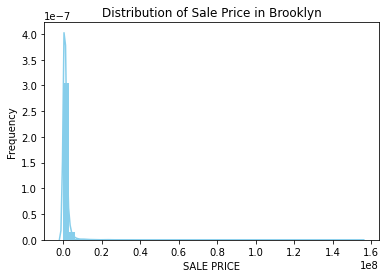

In [44]:
df_bor = df.groupby("BOROUGH")
bro = df_bor.get_group('Brooklyn')

ax = sns.distplot(bro['SALE PRICE'],
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='SALE PRICE', ylabel='Frequency', title='Distribution of Sale Price in Brooklyn')

Mengambil data SALE PRICE dalam range 10.000 - 16.000.000

In [45]:
data_bro = bro[(bro['SALE PRICE'] > 10000) & (bro['SALE PRICE'] < 16000000)]

C:\Users\FARADILLA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SALE PRICE', ylabel='Density'>

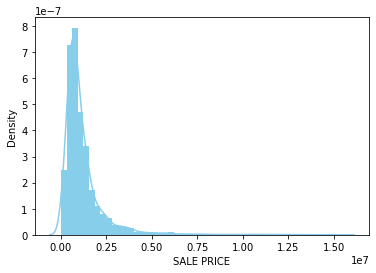

In [46]:
sns.distplot(data_bro['SALE PRICE'],
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})

Melakukan transformasi data ke bentuk logaritma dari data asli

In [47]:
data_bro['SALE PRICE'] = np.log(data_bro['SALE PRICE'])

<ipython-input-47-9dce3ead9122>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bro['SALE PRICE'] = np.log(data_bro['SALE PRICE'])


C:\Users\FARADILLA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'SALE PRICE'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Distribution of Sale Price in Brooklyn')]

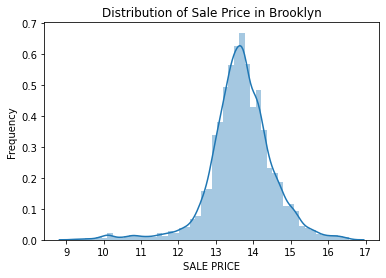

In [48]:
ax = sns.distplot(data_bro['SALE PRICE'], kde=True)
ax.set(xlabel='SALE PRICE', ylabel='Frequency', title='Distribution of Sale Price in Brooklyn')

Distribusi Sale Price di Brooklyn mengikuti Distribusi Normal

### Confidence Intervals

Bagaimana CI untuk SALE PRICE di Brooklyn?

In [49]:
df.groupby("BOROUGH").agg({"SALE PRICE":[np.mean, np.std, np.size]})

SALE PRICE                       
                       mean           std     size
BOROUGH                                           
Manhattan      5.883647e+06  3.710324e+07   5939.0
Bronx          1.009309e+06  3.730124e+06   3702.0
Brooklyn       1.417074e+06  4.204189e+06  11852.0
Queens         8.818463e+05  3.432667e+06  13044.0
Staten Island  5.079424e+05  4.598667e+05   5709.0

In [50]:
df.groupby("BOROUGH")["SALE PRICE"].describe()

,count,mean,std,min,25%,50%,75%,max
BOROUGH,,,,,,,,
Manhattan,5939.0,5.883647e+06,3.710324e+07,1.0,995000.0,1890000.0,4500000.0,2.210000e+09
Bronx,3702.0,1.009309e+06,3.730124e+06,1.0,345000.0,475000.0,625000.0,1.100000e+08
Brooklyn,11852.0,1.417074e+06,4.204189e+06,1.0,538490.5,850000.0,1370000.0,1.542500e+08
Queens,13044.0,8.818463e+05,3.432667e+06,1.0,427000.0,630000.0,875000.0,2.575000e+08
Staten Island,5709.0,5.079424e+05,4.598667e+05,1.0,340000.0,470000.0,600000.0,1.190000e+07


In [51]:
mean_brooklyn = 1.417074e+06
sd = 4.204189e+06
n = 11852     
z = 1.96
se = sd/np.sqrt(n)
print('Mean Brooklyn: ', mean_brooklyn)
print('Standar Deviasi: ', sd)
print('Banyaknya Brooklyn: ',n)
print('Z-Score: ', z)
print('standar error: ', se)

Mean Brooklyn:  1417074.0
Standar Deviasi:  4204189.0
Banyaknya Brooklyn:  11852
Z-Score:  1.96
standar error:  38617.70051095806


In [52]:
print('lower limit of CI: ',mean_brooklyn-z*se)
print('upper limit of CI: ',mean_brooklyn+z*se)

lower limit of CI:  1341383.3069985223
upper limit of CI:  1492764.6930014777


Diperoleh CI untuk SALE PRICE di Brooklyn adalah 1341383.30 - 1492764.69

### Hypothesis Testing

Apakah Brooklyn mempunyai Sale Price rata-rata yang lebih tinggi dari Bronx? 

In [53]:
import statsmodels.api as sm

In [54]:
bronx = df[df["BOROUGH"] == "Bronx"]
brooklyn = df[df["BOROUGH"] == "Brooklyn"]

In [55]:
n1 = len(bronx)
mu1 = bronx["SALE PRICE"].mean()
sd1 = bronx["SALE PRICE"].std()

(n1, mu1, sd1)

(3702, 1009309.1555915722, 3730123.768093132)

In [56]:
n2 = len(brooklyn)
mu2 = brooklyn["SALE PRICE"].mean()
sd2 = brooklyn["SALE PRICE"].std()

(n2, mu2, sd2)

(11852, 1417074.1256328046, 4204188.928488716)

In [57]:
sm.stats.ztest(bronx["SALE PRICE"].dropna(), 
brooklyn["SALE PRICE"].dropna(),alternative='two-sided')

(-5.2869571970483795, 1.243677256715241e-07)

Karena p-value (1.24e-07) sangat kecil, kita dapat reject the Null hypothesis bahwa rata-rata Sale Price Brooklyn sama dengan Bronx. Alternative="two-sided" digunakan dalam z-test karena di sini memeriksa ketidaksamaan.

### Normality Tests

Saphiro-Wilk Test

**Assumptions**
- Observations in each sample are independent and identically distributed (iid).

**Interpretation**
- H0: the sample has a Gaussian distribution.
- H1: the sample does not have a Gaussian distribution.

In [58]:
from scipy.stats import shapiro
data = df[df['BOROUGH'] == 'Queens']['SALE PRICE']
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.078, p=0.000
Probably not Gaussian


C:\Users\FARADILLA\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Karena p-value 0.000 maka H0 ditolak yang berarti bahwa sampel tidak berdistribusi Gaussian